In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('test.csv')

Dropping First column, land area ones since they came as blank

In [3]:
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [4]:
df.head()

,city,state,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,american indian or alaska native,asian,native hawaiian and other pacific islander,2+ races,hispanic,veteran,foreign born,owner occupied houses,avg value of owner occupied houses,avg rent,households,people per household,living in same house for over a year,language other than english spoken at home,households with computer,households with internet,"high school graduate or higher, 25+","bachelor's degree or higher, 25+","with disability, under 65","without health insurance, under 65","total labor force, 16+","female labor force, 16+","healthcare and social assistance revenue ($1,000)","manufacturers shipments ($1,000)","avg travel time to work (min), 16+",avg household income,per capita income in last 12 months,people in poverty,businesses,men owned businesses,female owned businesses,minority owned businesses,nonminority owned businesses,veteran owned businesses,nonveteran owned businesses,population per square mile,land area in square miles
0,Birmingham,Alabama,liberal,209880,6.5,20.3,14.2,53.1,25.3,70.5,0.2,0.9,0.0,1.6,3.7,12801,3.7,45.8,89200,797,89880,2.26,79.3,5.2,81.5,68.7,86.1,26.0,13.9,15.1,60.0,58.6,5574098,4118352,21.8,35346,22993,27.2,20738,10318,8286,10605,8770,2082,17113,0,0
1,Montgomery,Alabama,liberal,198218,6.8,24.0,13.7,53.0,33.3,60.6,0.2,2.8,0.0,1.9,3.6,14289,5.0,55.3,119600,867,79368,2.44,78.2,6.2,85.8,77.4,85.2,31.6,12.3,12.7,60.6,57.6,1759592,9125080,19.7,45921,27172,21.9,18043,8879,7459,8793,8363,2352,14434,0,0
2,Mobile,Alabama,liberal,189572,6.3,21.7,16.0,52.6,44.8,50.6,0.2,1.8,0.0,1.7,2.6,12292,3.4,53.9,121700,836,77668,2.37,84.8,4.7,81.6,70.0,88.5,28.5,9.9,13.6,56.5,54.7,2206244,3274416,22.4,40588,26023,22.0,20118,9703,8644,8808,10250,2275,16639,0,0
3,Huntsville,Alabama,liberal,197318,6.4,21.1,15.7,51.9,61.6,30.6,0.4,2.7,0.1,2.9,6.0,17224,6.6,57.5,176100,804,82858,2.24,79.8,7.9,89.5,82.7,90.4,42.9,9.3,12.3,62.3,57.4,2268155,6213842,19.1,53840,34589,17.7,16838,8211,6565,4380,11515,1816,13915,0,0
4,Tuscaloosa,Alabama,liberal,101113,5.9,18.8,11.7,52.4,51.1,44.1,0.3,2.4,0.1,1.1,3.1,4909,4.5,47.3,173900,843,35192,2.54,76.0,6.6,84.4,75.9,89.5,36.6,7.8,8.5,56.4,53.5,1116257,4234819,19.3,44120,25364,24.2,6802,3374,2530,1953,4375,670,5438,0,0


In [5]:
df.shape

(2983, 47)

In [6]:
df.columns

Index(['city', 'state', 'political affiliation', 'population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelor's degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household in

We dont need city or state anymore as they are just identifiers and potentially overpower local politics too much

In [7]:
df.drop(columns = ['city','state'],inplace=True)





Checking for class imbalance

In [8]:
df['political affiliation'].value_counts()

liberal         1763
conservative    1195
Name: political affiliation, dtype: int64

Checking for null values

In [9]:
df.isnull().sum()

political affiliation                                25
population                                            0
people under age 5                                    0
people under age 18                                   0
people 65 and older                                   0
female                                                0
white                                                 0
black                                                 0
american indian or alaska native                      0
asian                                                 0
native hawaiian and other pacific islander            0
2+ races                                              0
hispanic                                              0
veteran                                               0
foreign born                                          0
owner occupied houses                                 0
avg value of owner occupied houses                    0
avg rent                                        

checking for values = 0

In [10]:
df.isin([0]).sum()

political affiliation                                   0
population                                              0
people under age 5                                      1
people under age 18                                     0
people 65 and older                                     0
female                                                  0
white                                                   0
black                                                  41
american indian or alaska native                      394
asian                                                 140
native hawaiian and other pacific islander           1409
2+ races                                               10
hispanic                                                8
veteran                                                 0
foreign born                                            4
owner occupied houses                                   0
avg value of owner occupied houses                      6
avg rent      

In [11]:
df.drop(columns = ['healthcare and social assistance revenue ($1,000)','manufacturers shipments ($1,000)'],inplace=True)

In [12]:
df.head()


,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,american indian or alaska native,asian,native hawaiian and other pacific islander,2+ races,hispanic,veteran,foreign born,owner occupied houses,avg value of owner occupied houses,avg rent,households,people per household,living in same house for over a year,language other than english spoken at home,households with computer,households with internet,"high school graduate or higher, 25+","bachelor's degree or higher, 25+","with disability, under 65","without health insurance, under 65","total labor force, 16+","female labor force, 16+","avg travel time to work (min), 16+",avg household income,per capita income in last 12 months,people in poverty,businesses,men owned businesses,female owned businesses,minority owned businesses,nonminority owned businesses,veteran owned businesses,nonveteran owned businesses,population per square mile,land area in square miles
0,liberal,209880,6.5,20.3,14.2,53.1,25.3,70.5,0.2,0.9,0.0,1.6,3.7,12801,3.7,45.8,89200,797,89880,2.26,79.3,5.2,81.5,68.7,86.1,26.0,13.9,15.1,60.0,58.6,21.8,35346,22993,27.2,20738,10318,8286,10605,8770,2082,17113,0,0
1,liberal,198218,6.8,24.0,13.7,53.0,33.3,60.6,0.2,2.8,0.0,1.9,3.6,14289,5.0,55.3,119600,867,79368,2.44,78.2,6.2,85.8,77.4,85.2,31.6,12.3,12.7,60.6,57.6,19.7,45921,27172,21.9,18043,8879,7459,8793,8363,2352,14434,0,0
2,liberal,189572,6.3,21.7,16.0,52.6,44.8,50.6,0.2,1.8,0.0,1.7,2.6,12292,3.4,53.9,121700,836,77668,2.37,84.8,4.7,81.6,70.0,88.5,28.5,9.9,13.6,56.5,54.7,22.4,40588,26023,22.0,20118,9703,8644,8808,10250,2275,16639,0,0
3,liberal,197318,6.4,21.1,15.7,51.9,61.6,30.6,0.4,2.7,0.1,2.9,6.0,17224,6.6,57.5,176100,804,82858,2.24,79.8,7.9,89.5,82.7,90.4,42.9,9.3,12.3,62.3,57.4,19.1,53840,34589,17.7,16838,8211,6565,4380,11515,1816,13915,0,0
4,liberal,101113,5.9,18.8,11.7,52.4,51.1,44.1,0.3,2.4,0.1,1.1,3.1,4909,4.5,47.3,173900,843,35192,2.54,76.0,6.6,84.4,75.9,89.5,36.6,7.8,8.5,56.4,53.5,19.3,44120,25364,24.2,6802,3374,2530,1953,4375,670,5438,0,0


Currently all of our data types are continuous, many of these we will
later bucket and categorize but first we'll take a look at the distributions


In [13]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 43 columns):
political affiliation                         2958 non-null object
population                                    2983 non-null int64
people under age 5                            2983 non-null float64
people under age 18                           2983 non-null float64
people 65 and older                           2983 non-null float64
female                                        2983 non-null float64
white                                         2983 non-null float64
black                                         2983 non-null float64
american indian or alaska native              2983 non-null float64
asian                                         2983 non-null float64
native hawaiian and other pacific islander    2983 non-null float64
2+ races                                      2983 non-null float64
hispanic                                      2983 non-null float64
veteran     

## Outliers
Currently all of our features are continuous. We'll start looking at these in detail

In [14]:
df.rename(columns={"bachelor's degree or higher, 25+": 'bachelors degree or higher, 25+'},inplace=True)

In [15]:
continuous = ['population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'avg travel time to work (min), 16+', 'avg household income',
       'per capita income in last 12 months', 'people in poverty',
       'businesses', 'men owned businesses', 'female owned businesses',
       'minority owned businesses', 'nonminority owned businesses',
       'veteran owned businesses', 'nonveteran owned businesses',
       'population per square mile','land area in square miles']
for column in continuous:
    print(df[column].describe())
    print('\n')

count    2.983000e+03
mean     8.437858e+07
std      1.431121e+08
min      5.005000e+03
25%      1.145150e+04
50%      3.125300e+04
75%      3.271674e+08
max      3.271674e+08
Name: population, dtype: float64


count    2983.000000
mean        6.297586
std         1.440013
min         0.000000
25%         5.800000
50%         6.100000
75%         7.000000
max        14.700000
Name: people under age 5, dtype: float64


count    2983.000000
mean       22.988937
std         4.136385
min         0.100000
25%        21.500000
50%        22.400000
75%        25.100000
max        39.000000
Name: people under age 18, dtype: float64


count    2983.000000
mean       15.701274
std         4.931944
min         2.100000
25%        13.150000
50%        16.000000
75%        16.800000
max        82.800000
Name: people 65 and older, dtype: float64


count    2983.000000
mean       51.057593
std         2.693380
min        19.400000
25%        50.650000
50%        50.800000
75%        52.100000
max    

The percentages are in whole numbers so we're going to turn them into
percentages by dividing by 100

In [16]:
percentages = ['people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'foreign born', 'owner occupied houses','living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+', 'people in poverty']
for column in percentages:
    df[column]=df[column]/100
    print(df[column].describe())
    print('\n')

count    2983.000000
mean        0.062976
std         0.014400
min         0.000000
25%         0.058000
50%         0.061000
75%         0.070000
max         0.147000
Name: people under age 5, dtype: float64


count    2983.000000
mean        0.229889
std         0.041364
min         0.001000
25%         0.215000
50%         0.224000
75%         0.251000
max         0.390000
Name: people under age 18, dtype: float64


count    2983.000000
mean        0.157013
std         0.049319
min         0.021000
25%         0.131500
50%         0.160000
75%         0.168000
max         0.828000
Name: people 65 and older, dtype: float64


count    2983.000000
mean        0.510576
std         0.026934
min         0.194000
25%         0.506500
50%         0.508000
75%         0.521000
max         0.642000
Name: female, dtype: float64


count    2983.000000
mean        0.747094
std         0.176287
min         0.011000
25%         0.706500
50%         0.765000
75%         0.873000
max         0.99400

Turning veteran into % of population 

In [17]:
df['veteran'] = (df['veteran']/df['population'])

Most of the business counts by category can be interprolated from 
the others so removing them for multi-collinearity. People per household and Population per square mile can also be interprolated so dropping them.

In [18]:
df.drop(columns = ['people per household','men owned businesses','nonminority owned businesses','nonveteran owned businesses','population per square mile'],inplace=True)

Turning columns where we have counts and total into % to standardize
a bit

In [19]:
df['female owned businesses']=df['female owned businesses']/df['businesses']
df['minority owned businesses']=df['minority owned businesses']/df['businesses']
df['veteran owned businesses']=df['veteran owned businesses']/df['businesses']





In [20]:
df['veteran']

0       0.060992
1       0.072087
2       0.064841
3       0.087291
4       0.048550
          ...   
2978    0.058707
2979    0.049037
2980    0.067417
2981    0.056887
2982    0.056887
Name: veteran, Length: 2983, dtype: float64

In [21]:
#new continuous columns list
continuous = ['population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'avg travel time to work (min), 16+', 'avg household income',
       'per capita income in last 12 months', 'people in poverty',
       'businesses', 'female owned businesses',
       'minority owned businesses',
       'veteran owned businesses','land area in square miles']

With Outliers:


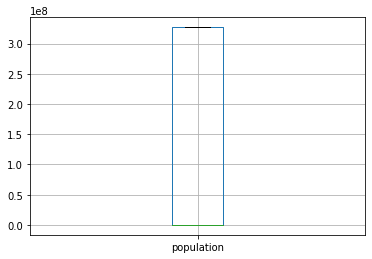

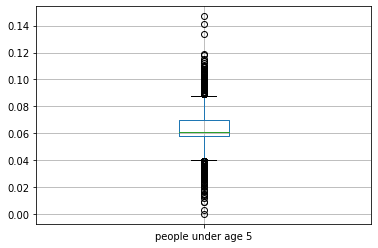

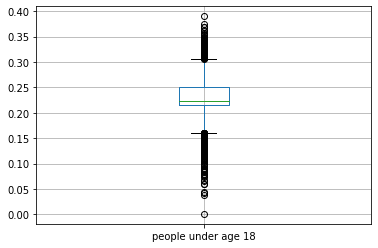

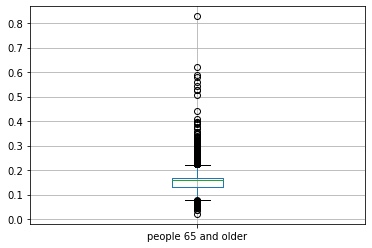

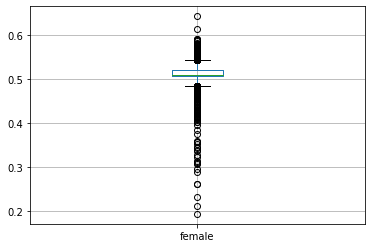

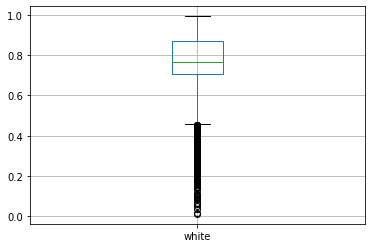

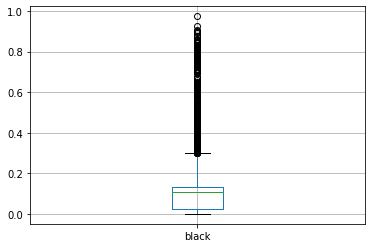

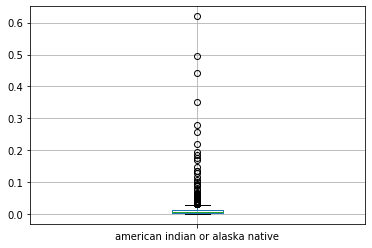

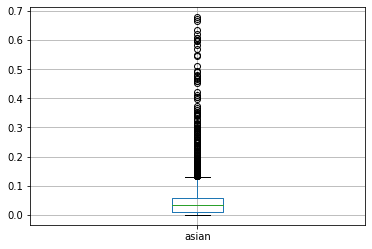

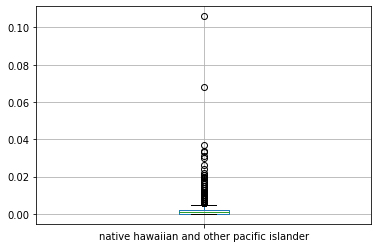

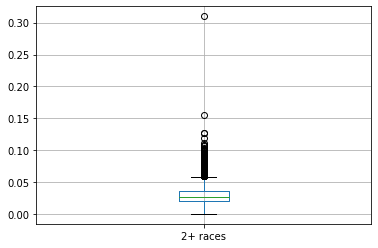

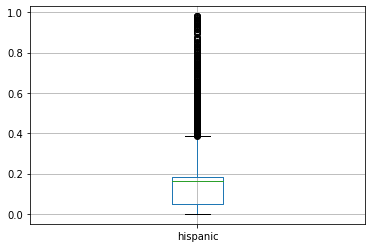

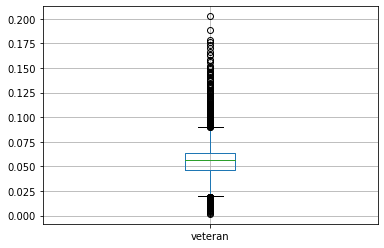

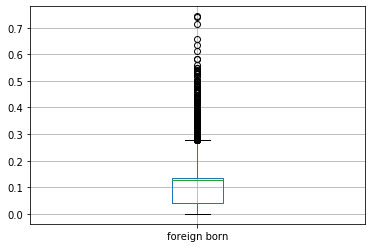

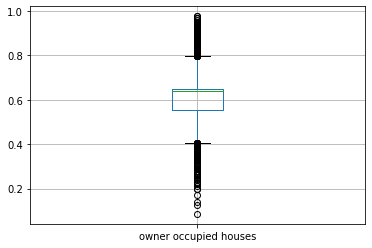

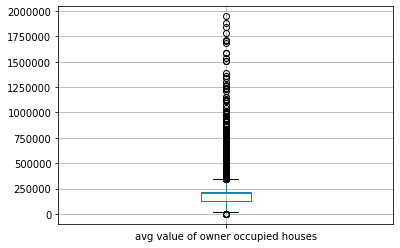

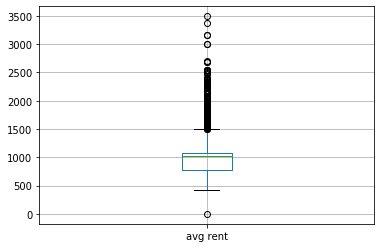

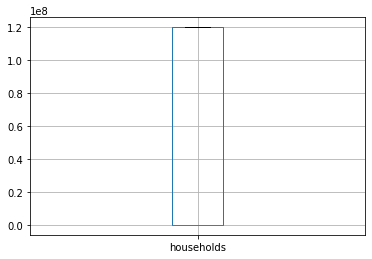

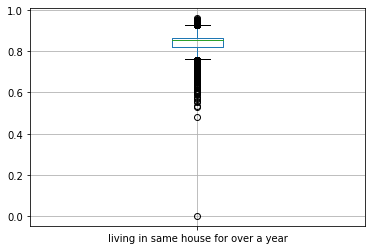

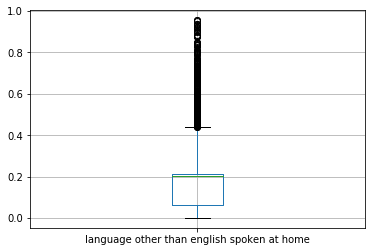

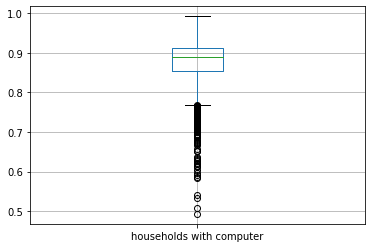

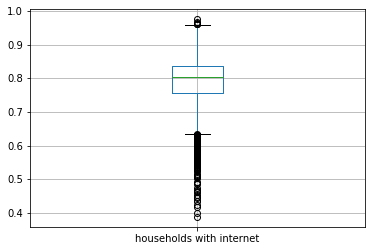

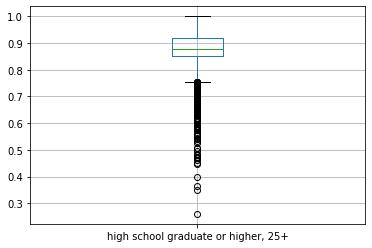

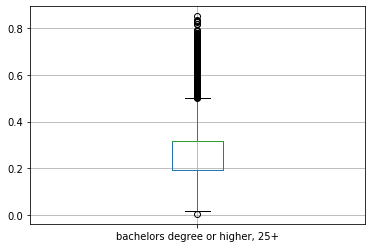

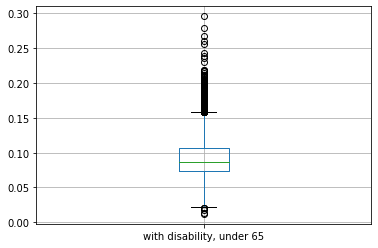

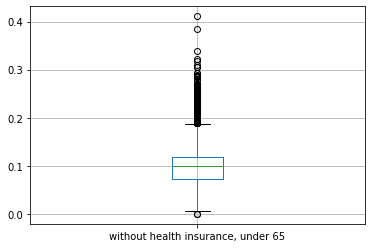

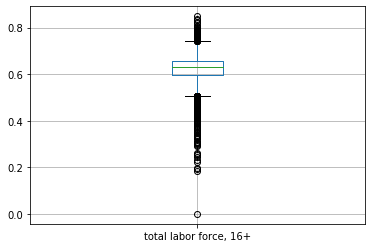

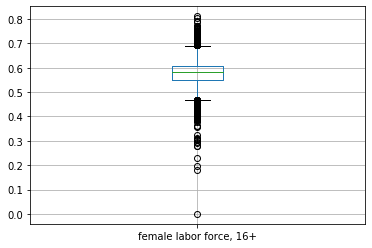

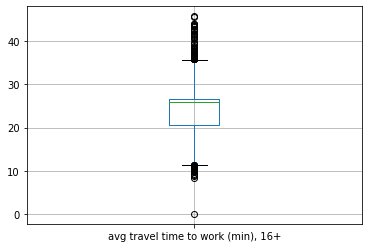

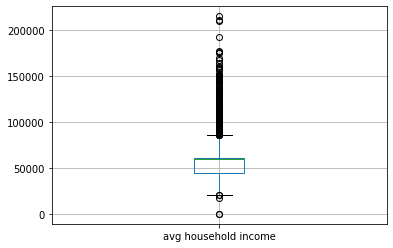

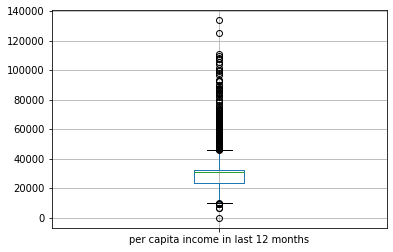

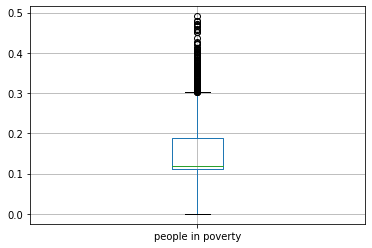

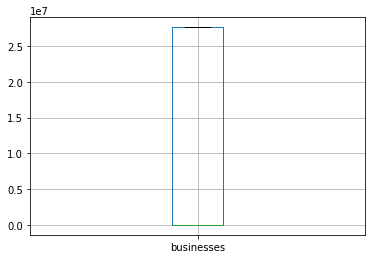

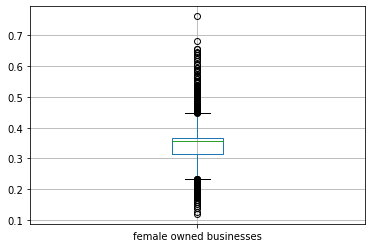

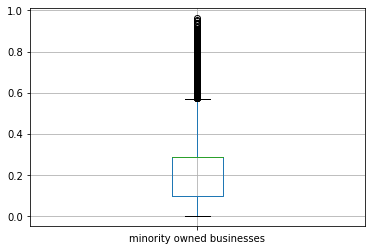

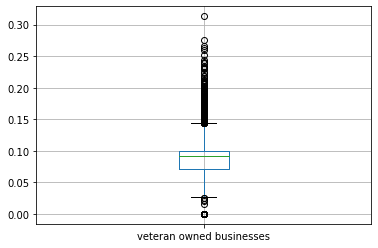

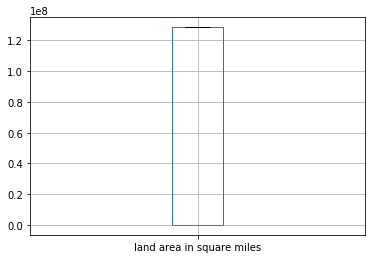

In [22]:
print("With Outliers:")
for column in continuous:
    df.boxplot(column=column)
    plt.show()

In [23]:

def remove_outliers(continous_columns, dataframe):
    """Return a dataframe with any values below the lower fence and above the upper fence removed from given columns in the given dataframe."""
    for column in continous_columns:
        # calculate values for lower fence and upper fence
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        # remove rows from dataframe which fall out of this range
        num_removing = dataframe.shape[0]
        new_df = dataframe[dataframe[column] > lower_fence]
        new_df = dataframe[dataframe[column] < upper_fence]
        num_removing -= new_df.shape[0]
        print(f"{num_removing} rows will be removed from {column}.")
    return new_df

In [24]:
remove_outliers(continuous, df)

0 rows will be removed from population.
153 rows will be removed from people under age 5.
141 rows will be removed from people under age 18.
176 rows will be removed from people 65 and older.
178 rows will be removed from female.
0 rows will be removed from white.
317 rows will be removed from black.
66 rows will be removed from american indian or alaska native.
166 rows will be removed from asian.
178 rows will be removed from native hawaiian and other pacific islander.
197 rows will be removed from 2+ races.
289 rows will be removed from hispanic.
181 rows will be removed from veteran.
273 rows will be removed from foreign born.
154 rows will be removed from owner occupied houses.
382 rows will be removed from avg value of owner occupied houses.
244 rows will be removed from avg rent.
0 rows will be removed from households.
61 rows will be removed from living in same house for over a year.
275 rows will be removed from language other than english spoken at home.
0 rows will be remove

,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,american indian or alaska native,asian,native hawaiian and other pacific islander,2+ races,hispanic,veteran,foreign born,owner occupied houses,avg value of owner occupied houses,avg rent,households,living in same house for over a year,language other than english spoken at home,households with computer,households with internet,"high school graduate or higher, 25+","bachelors degree or higher, 25+","with disability, under 65","without health insurance, under 65","total labor force, 16+","female labor force, 16+","avg travel time to work (min), 16+",avg household income,per capita income in last 12 months,people in poverty,businesses,female owned businesses,minority owned businesses,veteran owned businesses,land area in square miles
0,liberal,209880,0.065,0.203,0.142,0.531,0.253,0.705,0.002,0.009,0.000,0.016,0.037,0.060992,0.037,0.458,89200,797,89880,0.793,0.052,0.815,0.687,0.861,0.260,0.139,0.151,0.600,0.586,21.8,35346,22993,0.272,20738,0.399556,0.511380,0.100395,0
1,liberal,198218,0.068,0.240,0.137,0.530,0.333,0.606,0.002,0.028,0.000,0.019,0.036,0.072087,0.050,0.553,119600,867,79368,0.782,0.062,0.858,0.774,0.852,0.316,0.123,0.127,0.606,0.576,19.7,45921,27172,0.219,18043,0.413401,0.487336,0.130355,0
2,liberal,189572,0.063,0.217,0.160,0.526,0.448,0.506,0.002,0.018,0.000,0.017,0.026,0.064841,0.034,0.539,121700,836,77668,0.848,0.047,0.816,0.700,0.885,0.285,0.099,0.136,0.565,0.547,22.4,40588,26023,0.220,20118,0.429665,0.437817,0.113083,0
3,liberal,197318,0.064,0.211,0.157,0.519,0.616,0.306,0.004,0.027,0.001,0.029,0.060,0.087291,0.066,0.575,176100,804,82858,0.798,0.079,0.895,0.827,0.904,0.429,0.093,0.123,0.623,0.574,19.1,53840,34589,0.177,16838,0.389892,0.260126,0.107851,0
4,liberal,101113,0.059,0.188,0.117,0.524,0.511,0.441,0.003,0.024,0.001,0.011,0.031,0.048550,0.045,0.473,173900,843,35192,0.760,0.066,0.844,0.759,0.895,0.366,0.078,0.085,0.564,0.535,19.3,44120,25364,0.242,6802,0.371949,0.287121,0.098500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,liberal,29315,0.065,0.235,0.169,0.509,0.860,0.047,0.004,0.005,0.001,0.044,0.087,0.058707,0.018,0.509,64400,603,12652,0.859,0.094,0.829,0.712,0.859,0.169,0.155,0.065,0.564,0.523,14.7,31595,19304,0.314,1663,0.285027,0.058930,0.081179,0
2979,liberal,27204,0.074,0.239,0.126,0.502,0.755,0.149,0.009,0.005,0.000,0.067,0.056,0.049037,0.024,0.453,73000,728,9931,0.838,0.044,0.841,0.706,0.841,0.146,0.158,0.059,0.515,0.529,18.2,33958,17666,0.287,1478,0.407307,0.169147,0.119756,0
2980,liberal,28005,0.041,0.148,0.200,0.511,0.921,0.021,0.001,0.037,0.000,0.015,0.032,0.067417,0.074,0.564,360100,1200,12393,0.810,0.098,0.915,0.873,0.946,0.577,0.073,0.038,0.618,0.584,23.1,78402,50775,0.050,3410,0.318475,0.058065,0.125513,0
2981,conservative,327167434,0.061,0.224,0.160,0.508,0.765,0.134,0.013,0.059,0.002,0.027,0.183,0.056887,0.135,0.638,204900,1023,119730128,0.855,0.215,0.888,0.804,0.877,0.315,0.086,0.100,0.629,0.582,26.6,60293,32621,0.118,27626360,0.357571,0.287855,0.091278,128591812


Based on the number of outliers in our continous columns we plan to log transform most of them. Its not surprising that our data is skewed due to the population set of the 5000 largest cities. We would
expect some extremely tailed outliers.

In [25]:
logs = ['population','avg value of owner occupied houses',
                  'avg rent', 'households','avg household income',
                  'per capita income in last 12 months','businesses',
                  'land area in square miles']
for col in logs:
    df[col]=np.log(df[col])

/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
remove_outliers(continuous, df)

0 rows will be removed from population.
153 rows will be removed from people under age 5.
141 rows will be removed from people under age 18.
176 rows will be removed from people 65 and older.
178 rows will be removed from female.
0 rows will be removed from white.
317 rows will be removed from black.
66 rows will be removed from american indian or alaska native.
166 rows will be removed from asian.
178 rows will be removed from native hawaiian and other pacific islander.
197 rows will be removed from 2+ races.
289 rows will be removed from hispanic.
181 rows will be removed from veteran.
273 rows will be removed from foreign born.
154 rows will be removed from owner occupied houses.
228 rows will be removed from avg value of owner occupied houses.
140 rows will be removed from avg rent.
0 rows will be removed from households.
61 rows will be removed from living in same house for over a year.
275 rows will be removed from language other than english spoken at home.
0 rows will be remove

,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,american indian or alaska native,asian,native hawaiian and other pacific islander,2+ races,hispanic,veteran,foreign born,owner occupied houses,avg value of owner occupied houses,avg rent,households,living in same house for over a year,language other than english spoken at home,households with computer,households with internet,"high school graduate or higher, 25+","bachelors degree or higher, 25+","with disability, under 65","without health insurance, under 65","total labor force, 16+","female labor force, 16+","avg travel time to work (min), 16+",avg household income,per capita income in last 12 months,people in poverty,businesses,female owned businesses,minority owned businesses,veteran owned businesses,land area in square miles
0,liberal,12.254291,0.065,0.203,0.142,0.531,0.253,0.705,0.002,0.009,0.000,0.016,0.037,0.060992,0.037,0.458,11.398636,6.680855,11.406231,0.793,0.052,0.815,0.687,0.861,0.260,0.139,0.151,0.600,0.586,21.8,10.472941,10.042945,0.272,9.939723,0.399556,0.511380,0.100395,-inf
1,liberal,12.197123,0.068,0.240,0.137,0.530,0.333,0.606,0.002,0.028,0.000,0.019,0.036,0.072087,0.050,0.553,11.691908,6.765039,11.281851,0.782,0.062,0.858,0.774,0.852,0.316,0.123,0.127,0.606,0.576,19.7,10.734678,10.209942,0.219,9.800513,0.413401,0.487336,0.130355,-inf
2,liberal,12.152524,0.063,0.217,0.160,0.526,0.448,0.506,0.002,0.018,0.000,0.017,0.026,0.064841,0.034,0.539,11.709314,6.728629,11.260199,0.848,0.047,0.816,0.700,0.885,0.285,0.099,0.136,0.565,0.547,22.4,10.611228,10.166736,0.220,9.909370,0.429665,0.437817,0.113083,-inf
3,liberal,12.192572,0.064,0.211,0.157,0.519,0.616,0.306,0.004,0.027,0.001,0.029,0.060,0.087291,0.066,0.575,12.078807,6.689599,11.324884,0.798,0.079,0.895,0.827,0.904,0.429,0.093,0.123,0.623,0.574,19.1,10.893772,10.451291,0.177,9.731394,0.389892,0.260126,0.107851,-inf
4,liberal,11.523994,0.059,0.188,0.117,0.524,0.511,0.441,0.003,0.024,0.001,0.011,0.031,0.048550,0.045,0.473,12.066236,6.736967,10.468574,0.760,0.066,0.844,0.759,0.895,0.366,0.078,0.085,0.564,0.535,19.3,10.694668,10.141086,0.242,8.824972,0.371949,0.287121,0.098500,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,liberal,10.285855,0.065,0.235,0.169,0.509,0.860,0.047,0.004,0.005,0.001,0.044,0.087,0.058707,0.018,0.509,11.072869,6.401917,9.445571,0.859,0.094,0.829,0.712,0.859,0.169,0.155,0.065,0.564,0.523,14.7,10.360754,9.868068,0.314,7.416378,0.285027,0.058930,0.081179,-inf
2979,liberal,10.211119,0.074,0.239,0.126,0.502,0.755,0.149,0.009,0.005,0.000,0.067,0.056,0.049037,0.024,0.453,11.198215,6.590301,9.203416,0.838,0.044,0.841,0.706,0.841,0.146,0.158,0.059,0.515,0.529,18.2,10.432880,9.779397,0.287,7.298445,0.407307,0.169147,0.119756,-inf
2980,liberal,10.240138,0.041,0.148,0.200,0.511,0.921,0.021,0.001,0.037,0.000,0.015,0.032,0.067417,0.074,0.564,12.794137,7.090077,9.424887,0.810,0.098,0.915,0.873,0.946,0.577,0.073,0.038,0.618,0.584,23.1,11.269605,10.835159,0.050,8.134468,0.318475,0.058065,0.125513,-inf
2981,conservative,19.605983,0.061,0.224,0.160,0.508,0.765,0.134,0.013,0.059,0.002,0.027,0.183,0.056887,0.135,0.638,12.230277,6.930495,18.600751,0.855,0.215,0.888,0.804,0.877,0.315,0.086,0.100,0.629,0.582,26.6,11.006971,10.392712,0.118,17.134281,0.357571,0.287855,0.091278,18.672154


# EDA

In [27]:

df.rename(columns={"political affiliation": "politics"},inplace = True)

Target Variable
politics
conservative    1195
liberal         1763
Name: politics, dtype: int64


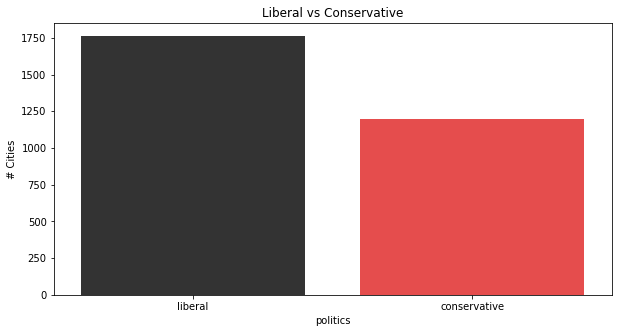

In [28]:

# Politics Count
print('Target Variable')
print(df.groupby(['politics']).politics.count())

# Target Variable Countplot
plt.figure(figsize = (10,5))
sns.countplot(df['politics'], alpha =.80, palette= ['black','red'])
plt.title('Liberal vs Conservative')
plt.ylabel('# Cities')
plt.show()

In [29]:

# Identify non-percentage continuous features
print('Non-Percentage Features')
non_percentage = ['population','avg value of owner occupied houses',
                  'avg rent', 'households',
                  'avg travel time to work (min), 16+', 'avg household income',
                  'per capita income in last 12 months','businesses',
                  'land area in square miles']
print(df[non_percentage].describe().transpose())



Non-Percentage Features
                                      count       mean       std       min  \
population                           2983.0  12.464436  4.307865  8.518193   
avg value of owner occupied houses   2983.0       -inf       NaN      -inf   
avg rent                             2983.0       -inf       NaN      -inf   
households                           2983.0  11.465043  4.301728  6.269096   
avg travel time to work (min), 16+   2983.0  24.224740  5.519552  0.000000   
avg household income                 2983.0       -inf       NaN      -inf   
per capita income in last 12 months  2983.0       -inf       NaN      -inf   
businesses                           2983.0       -inf       NaN      -inf   
land area in square miles            2983.0       -inf       NaN      -inf   

                                           25%        50%        75%  \
population                            9.345874  10.349871  19.605983   
avg value of owner occupied houses   11.781807  12.

/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3949: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


ValueError: supplied range of [-inf, 8.158516244806831] is not finite

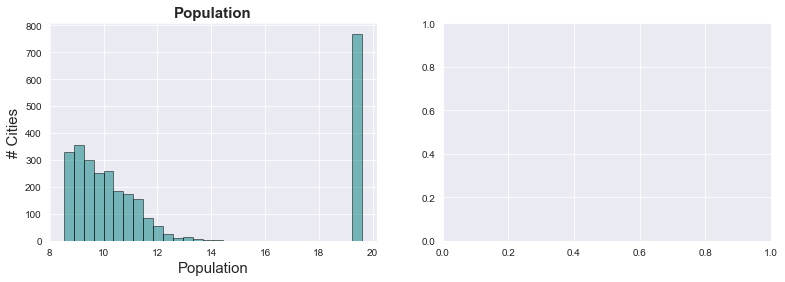

In [32]:
# Subplots of Non-Percentage Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .50)

ax1 = fig.add_subplot(331)
ax1.hist(df['population'], bins = 30, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Population', fontsize = 15)
ax1.set_ylabel('# Cities',fontsize = 15)
ax1.set_title('Population',fontsize = 15,fontweight='bold')

ax2 = fig.add_subplot(332)
ax2.hist(df['avg rent'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Med Rent',fontsize = 15)
ax2.set_ylabel('# Cities',fontsize = 15)
ax2.set_title('Med Rent',fontsize = 15,fontweight='bold')

ax3 = fig.add_subplot(333)
ax3.hist(df['households'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('# Households',fontsize = 15)
ax3.set_ylabel('# Cities',fontsize = 15)
ax3.set_title('# Households',fontsize = 15,fontweight='bold')

ax4 = fig.add_subplot(334)
ax4.hist(df['avg travel time to work (min), 16+'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Med Travel Time to Work (min), 16+', fontsize = 15)
ax4.set_ylabel('# Cities',fontsize = 15)
ax4.set_title('Med Travel Time to Work (min), 16+',fontsize = 15,fontweight='bold')

ax5 = fig.add_subplot(335)
ax5.hist(df['avg household income'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Med Household Income', fontsize = 15)
ax5.set_ylabel('# Cities',fontsize = 15)
ax5.set_title('Med Household Income',fontsize = 15,fontweight='bold')

ax6 = fig.add_subplot(336)
ax6.hist(df['avg value of owner occupied houses'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('Med Value of Owner Occupied Houses',fontsize = 15)
ax6.set_ylabel('# Cities',fontsize = 15)
ax6.set_title('Med Value of Owner Occupied Houses',fontsize = 15,fontweight='bold')

ax7 = fig.add_subplot(337)
ax7.hist(df['per capita income in last 12 months'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax7.set_xlabel('Per Capita Income',fontsize = 15)
ax7.set_ylabel('# Cities',fontsize = 15)
ax7.set_title('Per Capita Income',fontsize = 15,fontweight='bold')

ax8 = fig.add_subplot(338)
ax8.hist(df['businesses'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax8.set_xlabel('# Businesses', fontsize = 15)
ax8.set_ylabel('# Cities',fontsize = 15)
ax8.set_title('# Businesses',fontsize = 15,fontweight='bold')

ax9 = fig.add_subplot(339)
ax9.hist(df['land area in square miles'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax9.set_xlabel('Land Area in sq miles', fontsize = 15)
ax9.set_ylabel('# Cities',fontsize = 15)
ax9.set_title('Land Area in sq miles',fontsize = 15,fontweight='bold')

plt.show()

In [ ]:
df['population'].value_counts()

In [ ]:

# Identify non-percentage continuous features
print('Percentage Features')
percentage = ['people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses','living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+','people in poverty','female owned businesses',
       'minority owned businesses',
       'veteran owned businesses']
print(df[percentage].describe().transpose())


In [ ]:
df.shape